# Homework 09
This homework is based on the classification and regression lectures.

## Question 1
#### In the table below, fill in the definition column with a short (no more than two sentence) definition for each vocab word. If it can be summarized by a formula, give the formula. 

| Vocab Word | Definition |
|:--------|:--------|
| **One-hot coding** | Converts each categorical column into a separate binary column. |
| **Feature selection*** | The idea of selecting the relevant features that would restrict our model to just the most important variables. |
| **Classifier** | A model that assigns inputs to categories instead of predicting numeric values (e.g. classification tree). |
| **Precision** | (# of true positives) / (# of true positives + # of false positives)  |
| **Recall** | (# of true positives) / (# of true positives + # false negatives) |
| **F1 Score** | 2 * (precision * recall) / (precision + recall) |
| **Parsimonious model** | A model that is simple as possible while still explaining the data well. |
| **Ridge regression** | A regression model where we add a penalty term Bj^2 multiplied by some constant to the loss function (which we are minimizing). So, if Bj starts to get too big, then it would penalize the objective function. |
| **LASSO regression** | Similar to the ridge regression model, but instead of Bj^2 we add the total sum of all the absolute values of Bj from j = 1 to n multiplied by some constant to the loss function that we are minimizing. This forces the coefficients to 0 one at a time instead of constraining the total coefficient sum.  |
| **Cross validation** | We split the dataset into k groups, and for each unique group: make it a test or hold-out set, and following that, we take the remaining groups as training sets, and finally fit on the training set and evaluate on the test set. For each held out fold, we use many of the same data points to calculate the model; thus, we expect the results to depend more on the smaller folds with less points. |
| **Tree based methods** | Given independent variables and a dependent variable, we use a series of questions about the independent variables to separate the dataset into more manageable pieces. |

*Just give the general idea.

## Question 2 
#### a) What shape does a perfect classifier look like on an ROC curve? What about a bad classifier?
#### b) Think about the formula for an F1 score. What does it mean when the F1 score is close to 1? Close to 0?

a) The shape would be a rectangle if it was a perfect classifier. A bad classifier would look like the line y=x.                  

b) If the F1 score is close to 1, that means that the precision and recall are close to 1, which then means that the number of false positives and false negatives have to be close to 0, indicating that the model is doing really good. If the F1 score is close to 0, that means the number of true positives are close to 0, which means the model is doing bad. 

## Question 3
#### Compare the following aspects of linear vs. logistic regression.
|  | Linear | Logistic |
|:--------|:--------|:--------|
| **Chart Shape** | Straight line | S-shaped curve |
| **Dependent Variable Type** | Numerical | Categorical |
| **Purpose** (regression or classification) | Predicts numerical  values | Predicts probabilities and uses those to classify inputs into categories |
| **Range of output variable** ($y_i$ or $p_i$) | Negative infinity to positive infinity | 0 to 1 |
| **Method*** | Ordinary least squares | Maximum likelihood estimation |
| **Example of use** | Predicting height based off of weight and age | Predicing whether a penguin is a king or emperor penguin |  
  
*Meaning ordinary least squares or maximum likelihood estimation

## Question 4
#### Why is it important to train then test our model? How do we do that? (2-3 sentences. Not looking for code, just general explanation).

We train the model so it can pick up on patterns in the data, then we test the model to make sure that it can pick up on those patterns on unknown or new data. Additionally, this is so the model isn't overfit and picks up on patterns that aren't really there or relevant. To do this, we can either split our original data in a 80-20 or 70-30 split (training-test) since we don't have new data that we can test on. Another way would be k-folds cross validation, where we split our data into a number of unique groups and then for each one of those groups we either make it a hold-out or test set, turning the rest into a training set. Then we, fit and evaluate and then summarize the model's effectiveness by looking at the sample of evaluation scores.

## Question 5
This question runs through a linear regression example. We want to predict median house value based on the other variables.
#### a) First, load the `housing.csv` data set. Look at the data in some useful way. Why is linear regression appropriate here?

#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [1]:
library(tidyverse);
housing <- read_csv('housing.csv')
housing

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.1
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 20640 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (8): longitude, latitude, housing_median_age, total_rooms, population, h...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-122.23,37.88,41,880,322,126,8.3252,452600
-122.22,37.86,21,7099,2401,1138,8.3014,358500
-122.24,37.85,52,1467,496,177,7.2574,352100
-122.25,37.85,52,1274,558,219,5.6431,341300
-122.25,37.85,52,1627,565,259,3.8462,342200
-122.25,37.85,52,919,413,193,4.0368,269700
-122.25,37.84,52,2535,1094,514,3.6591,299200
-122.25,37.84,52,3104,1157,647,3.1200,241400
-122.26,37.84,42,2555,1206,595,2.0804,226700


Linear regression is appropriate because we have a numerical dependent variable, median_house_value, that we would like to predict based off of the other numerical features in the dataset that would reasonably seem to have some sort of impact on house value such as the number of rooms, location, house age, and etc. 

In [2]:
# b
set.seed(123)
scale <- function(x){
  (x - min(x)) / (max(x)-min(x))
}
housing_scaled <- housing %>% mutate(across(everything(), scale))
train <- runif(nrow(housing_scaled)) < 0.75
test <- !train
housing_scaled

longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.2111554,0.5674814,0.7843137,0.02233074,0.008940834,0.02055583,0.53966842,0.9022664
0.2121514,0.5653560,0.3921569,0.18050257,0.067210404,0.18697583,0.53802706,0.7082466
0.2101594,0.5642933,1.0000000,0.03726029,0.013817652,0.02894261,0.46602805,0.6950507
0.2091633,0.5642933,1.0000000,0.03235159,0.015555369,0.03584937,0.35469856,0.6727828
0.2091633,0.5642933,1.0000000,0.04132967,0.015751563,0.04242723,0.23077613,0.6746385
0.2091633,0.5642933,1.0000000,0.02332265,0.011491353,0.03157375,0.24392077,0.5251545
0.2091633,0.5632306,1.0000000,0.06442342,0.030578211,0.08436112,0.21787286,0.5859790
0.2091633,0.5632306,1.0000000,0.07889516,0.032343956,0.10623253,0.18069406,0.4668043
0.2081673,0.5632306,0.8039216,0.06493209,0.033717313,0.09768130,0.10899850,0.4364951


#### c) Fit the model.

In [3]:
v = median_house_value ~ longitude + latitude + housing_median_age + total_rooms + population + households + median_income
m <- lm(v, housing_scaled %>% filter(train))
summary(m)


Call:
lm(formula = v, data = housing_scaled %>% filter(train))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.11495 -0.09080 -0.02335  0.06400  1.00888 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.728806   0.015356   47.46   <2e-16 ***
longitude          -0.868215   0.016894  -51.39   <2e-16 ***
latitude           -0.817586   0.015007  -54.48   <2e-16 ***
housing_median_age  0.122501   0.005194   23.59   <2e-16 ***
total_rooms        -0.065063   0.065076   -1.00    0.317    
population         -3.526248   0.092512  -38.12   <2e-16 ***
households          1.967049   0.062952   31.25   <2e-16 ***
median_income       1.143536   0.010837  105.52   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1425 on 15556 degrees of freedom
Multiple R-squared:  0.6399,	Adjusted R-squared:  0.6397 
F-statistic:  3948 on 7 and 15556 DF,  p-value: < 2.2e-16


#### d) Make predictions on test data and show them in an actual vs. predicted plot.

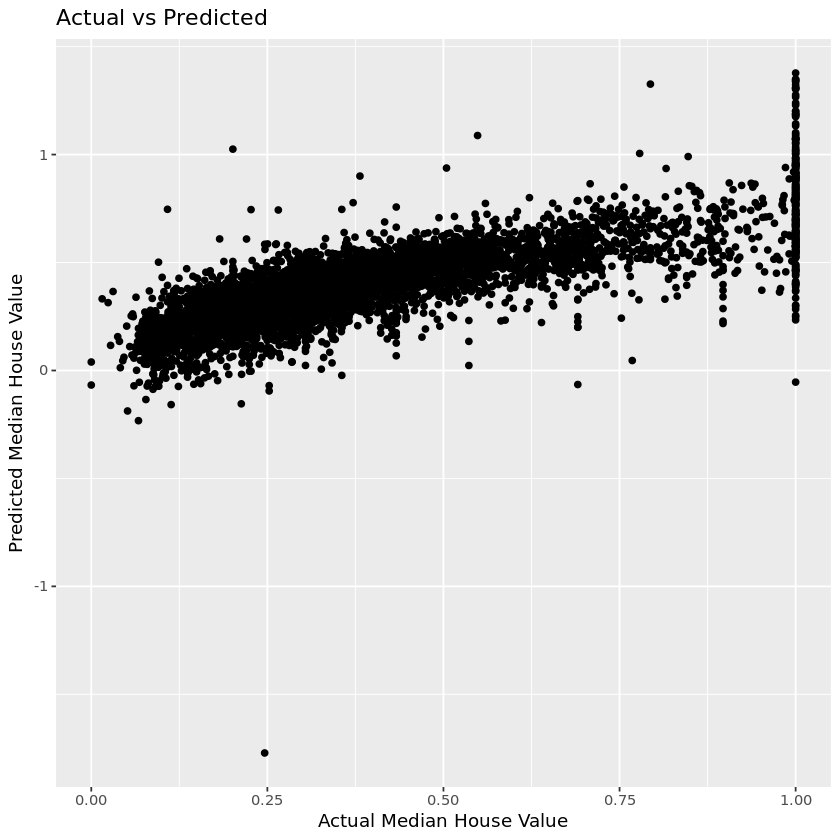

In [4]:
housing_test <- housing_scaled %>% filter(test);
housing_test <- housing_test %>% mutate(med_house_val_pred = predict(m, housing_test))
ggplot(housing_test, aes(x = median_house_value, y = med_house_val_pred)) +
  geom_point() + 
  labs(title = "Actual vs Predicted",
       x = "Actual Median House Value",
       y = "Predicted Median House Value")

#### e) Make a residuals plot.

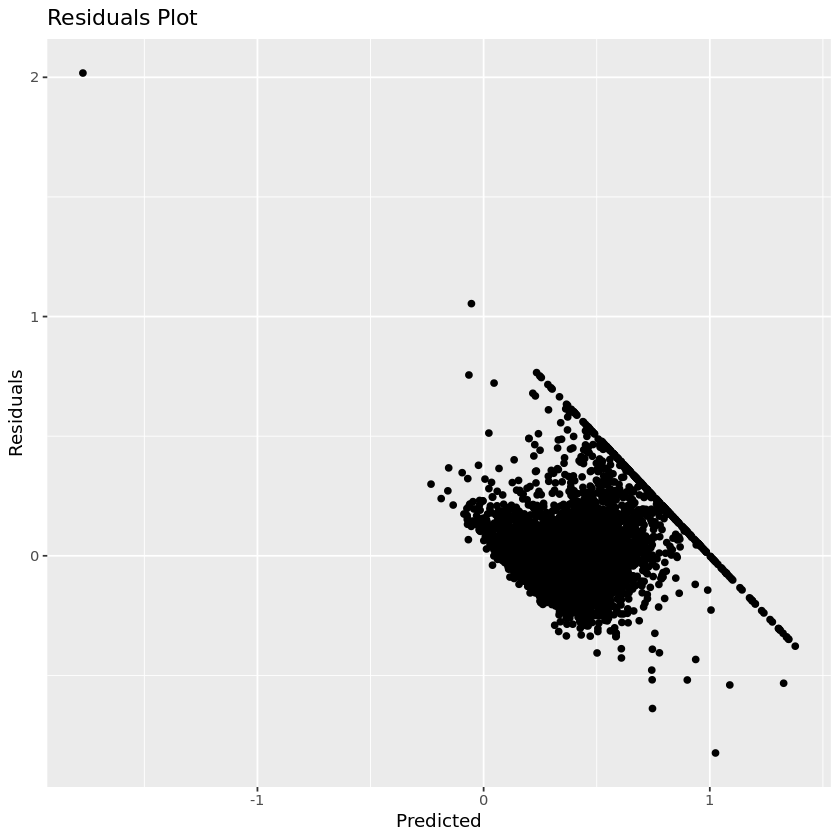

In [5]:
ggplot(housing_test, aes(x = med_house_val_pred, y = median_house_value - med_house_val_pred)) +
  geom_point() + 
  labs(title = "Residuals Plot", x = "Predicted", y = "Residuals")

## Question 6
This question runs through a logistic regression example. We want to predict diabetes diagnosis based on the other variables. 
#### a) First, load the `diabetes.csv` data set. Look at the data in some useful way. Why is logistic regression appropriate here?

Logistic regression is appropriate because we are trying to predict a binary outcome (trying to put our input into a category).

In [14]:
diabetes <- read_csv("diabetes.csv", show_col_types = FALSE)
diabetes

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1


#### b) Scale data and split it 75/25 training/testing. Set seed = 123.

In [22]:
set.seed(123)
scale <- function(x){
  (x - min(x)) / (max(x)-min(x))
}
n <- nrow(diabetes)
train_idx <- sample.int(n, size = floor(0.1 * n))
diabetes_train <- diabetes %>% slice(train_idx)
diabetes_test  <- diabetes %>% slice(setdiff(seq_len(n), train_idx))
diabetes_train %>% write_csv("diabetes_train.csv")
diabetes_test  %>% write_csv("diabetes_test.csv")
diabetes_scaled

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.35294118,0.7437186,0.5901639,0.3535354,0.00000000,0.5007452,0.23441503,0.48333333,1
0.05882353,0.4271357,0.5409836,0.2929293,0.00000000,0.3964232,0.11656704,0.16666667,0
0.47058824,0.9195980,0.5245902,0.0000000,0.00000000,0.3472429,0.25362938,0.18333333,1
0.05882353,0.4472362,0.5409836,0.2323232,0.11111111,0.4187779,0.03800171,0.00000000,0
0.00000000,0.6884422,0.3278689,0.3535354,0.19858156,0.6423249,0.94363792,0.20000000,1
0.29411765,0.5829146,0.6065574,0.0000000,0.00000000,0.3815201,0.05251921,0.15000000,0
0.17647059,0.3919598,0.4098361,0.3232323,0.10401891,0.4619970,0.07258753,0.08333333,1
0.58823529,0.5778894,0.0000000,0.0000000,0.00000000,0.5260805,0.02391119,0.13333333,0
0.11764706,0.9899497,0.5737705,0.4545455,0.64184397,0.4545455,0.03415884,0.53333333,1


#### c) Fit the model.

In [24]:
v <- Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age;
m <- glm(v, diabetes_train, family = binomial())
summary(m)


Call:
glm(formula = v, family = binomial(), data = diabetes_train)

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -8.660739   2.427947  -3.567 0.000361 ***
Pregnancies               0.110094   0.090316   1.219 0.222848    
Glucose                   0.025308   0.011003   2.300 0.021446 *  
BloodPressure             0.001835   0.019576   0.094 0.925307    
SkinThickness             0.014549   0.023324   0.624 0.532776    
Insulin                  -0.001509   0.002434  -0.620 0.535259    
BMI                       0.108215   0.062931   1.720 0.085507 .  
DiabetesPedigreeFunction  0.307784   0.820988   0.375 0.707739    
Age                       0.016757   0.031529   0.531 0.595091    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 98.898  on 75  degrees of freedom
Residual deviance: 76.074  on 67  degrees of freedom
AIC: 94.074

Nu

#### d) Make predictions on test data. Print a table with the number of true positives, false positives, true negatives, false negatives, and accuracy. 

In [25]:
p <- predict(m, diabetes_test, type = "response")
pred <- as.integer(p >= 0.5)
truth <- diabetes_test$Outcome
tp <- sum(pred == 1 & truth == 1)
fp <- sum(pred == 1 & truth == 0)
tn <- sum(pred == 0 & truth == 0)
fn <- sum(pred == 0 & truth == 1)
acc <- (tp + tn) / (tp + fp + tn + fn)
df <- tibble(
  measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
  value   = c(tp, fp, tn, fn, acc)
)
df

measure,value
<chr>,<dbl>
True Positive,147.0000000
False Positive,72.0000000
True Negative,379.0000000
False Negative,94.0000000
Accuracy,0.7601156


#### e) Fit a LASSO-regularized logistic regression model. Again, set seed = 123. Which variables are the most important (which ones don't go to zero)? How does the LASSO model affect the accuracy?

The most important variables are pregnancies, glucose, and BMI. The LASSO model increases accuracy.

In [47]:
library(glmnet)
set.seed(123)

X_train <- model.matrix(Outcome ~ ., diabetes_train)[, -1]  
y_train <- diabetes_train$Outcome
X_test  <- model.matrix(Outcome ~ ., diabetes_test)[, -1]
y_test  <- diabetes_test$Outcome
cv_lasso <- cv.glmnet(X_train, y_train, alpha = 1, family = "binomial")
coef(cv_lasso, s = "lambda.min")
lasso_pred_probability <- predict(cv_lasso, X_test, s = "lambda.min", type = "response")
lasso_pred <- as.integer(lasso_pred_probability >= 0.5)
tp <- sum(lasso_pred == 1 & y_test == 1)
fp <- sum(lasso_pred == 1 & y_test == 0)
tn <- sum(lasso_pred == 0 & y_test == 0)
fn <- sum(lasso_pred == 0 & y_test == 1)
acc <- (tp + tn) / (tp + fp + tn + fn)
tibble(measure = c("True Positive", "False Positive", "True Negative", "False Negative", "Accuracy"),
  value = c(tp, fp, tn, fn, acc))

9 x 1 sparse Matrix of class "dgCMatrix"
                          lambda.min
(Intercept)              -4.65391947
Pregnancies               0.06314373
Glucose                   0.01736257
BloodPressure             .         
SkinThickness             .         
Insulin                   .         
BMI                       0.05226915
DiabetesPedigreeFunction  .         
Age                       .         

measure,value
<chr>,<dbl>
True Positive,120.0000000
False Positive,31.0000000
True Negative,420.0000000
False Negative,121.0000000
Accuracy,0.7803468


#### f) Make a plot of actual vs. predicted values for the LASSO model.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


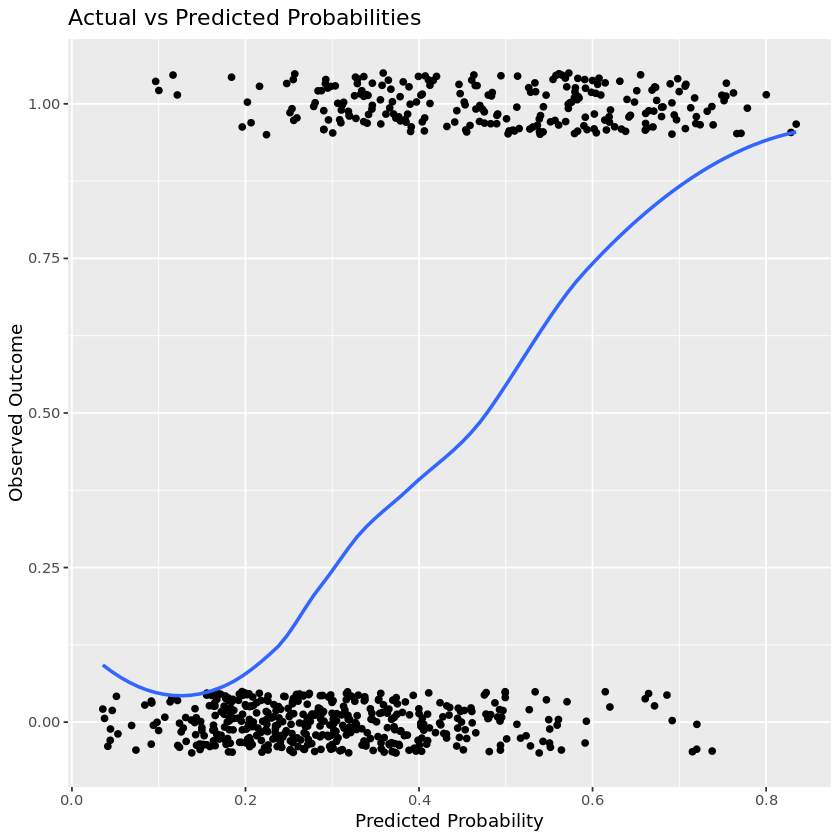

In [40]:
data <- data.frame(y_test, lasso_pred_probability)
ggplot(data, aes(x = lasso_pred_probability, y = y_test)) +
  geom_jitter(height = 0.05) +
  geom_smooth(se = FALSE) +
  labs(title = "Actual vs Predicted Probabilities",
       x = "Predicted Probability", y = "Observed Outcome")